# Task 1: Exploratory Data Analysis (EDA) and Business Insights

# Step 1: Loading the Data

In [1]:
import pandas as pd

# Load the datasets
customers_df = pd.read_csv("/content/Customers.csv")
products_df = pd.read_csv("/content/Products.csv")
transactions_df = pd.read_csv("/content/Transactions.csv")

# Step 2: Checking the Data Structure

In [2]:
# Check the first few rows
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Check data types and null values
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# Step 3: Identify Missing Values and Duplicates

In [3]:
# Missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Duplicates
print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


# Step 5: Merge Datasets for detailed analysis

In [4]:
# Merge transactions with customers
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")

# Merge the result with products
merged_df = merged_df.merge(products_df, on="ProductID", how="left")

# Inspect the merged dataset
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

# Step 6: Performing EDA

1. Region counts:  Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
2. Most popular products:  ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
ActiveWear Rug           29
SoundWave Cookbook       29
HomeSense Desk Lamp      28
ActiveWear Jacket        26
TechPro Textbook         25
TechPro T-Shirt          24
ActiveWear Textbook      23
Name: count, dtype: int64
3. Revenue by region:  Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
5. Avg order value:  689.9955600000001


<ipython-input-7-4e78540fa7e3>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df.set_index('TransactionDate')['TotalValue'].resample('M').sum().plot()


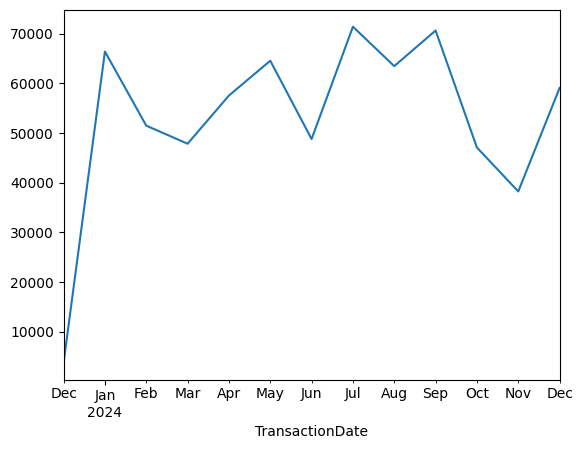

In [7]:
#1. Customer Distribution by Region
region_counts = customers_df['Region'].value_counts()
print("1. Region counts: ", region_counts)

#2. Most Popular Products
popular_products = merged_df['ProductName'].value_counts().head(10)
print("2. Most popular products: ", popular_products)

#3. Revenue by Region
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum()
print("3. Revenue by region: ", revenue_by_region)

#4. Transaction Trends Over Time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df.set_index('TransactionDate')['TotalValue'].resample('M').sum().plot()

#5. Average Order Value
avg_order_value = merged_df['TotalValue'].mean()
print("5. Avg order value: ", avg_order_value)